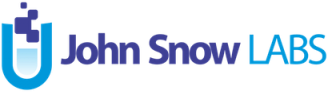

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/test-specific-notebooks/Robustness_DEMO.ipynb)


**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, or Spacy** models, it has got you covered. You can test any Named Entity Recognition (NER) and Text Classification model using the libraray. The library supports 50+ out of the box tests. These tests fall into robustness, accuracy, bias, representation and fairness test categories.

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest

In [ ]:
!pip install langtest

# John Snow Labs setup

In [ ]:
!pip install johnsnowlabs

# Harness and its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [1]:
#Import Harness from the LangTest library
from langtest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>



| Parameter     | Description |
| - | - |
| **task**      | Task for which the model is to be evaluated (text-classification or ner) |
| **model**     | Specifies the model(s) to be evaluated. This parameter can be provided as either a dictionary or a list of dictionaries. Each dictionary should contain the following keys: <ul><li>model (mandatory): 	PipelineModel or path to a saved model or pretrained pipeline/model from hub.</li><li>hub (mandatory): Hub (library) to use in back-end for loading model from public models hub or from path</li></ul>|
| **data**      | The data to be used for evaluation. A dictionary providing flexibility and options for data sources. It should include the following keys: <ul><li>data_source (mandatory): The source of the data.</li><li>subset (optional): The subset of the data.</li><li>feature_column (optional): The column containing the features.</li><li>target_column (optional): The column containing the target labels.</li><li>split (optional): The data split to be used.</li><li>source (optional): Set to 'huggingface' when loading Hugging Face dataset.</li></ul> |
| **config**    | Configuration for the tests to be performed, specified in the form of a YAML file. |


<br/>
<br/>

# Robustness Testing

Model robustness can be described as the ability of a model to keep similar levels of accuracy, precision and recall when perturbations are made to the data it is predicting on. For example, in the case of NER, the goal is to understand how documents with typos or fully uppercased sentences affect the model's prediction performance compared to documents similar to those in the original training set.



**`Supported Robustness tests :`**<br>


- **`uppercase`**: capitalization of the test set is turned into uppercase

- **`lowercase`**: capitalization of the test set is turned into lowercase

- **`titlecase`**: capitalization of the test set is turned into title case

- **`add_punctuation`**: special characters at end of each sentence are replaced by other special characters, if no
special character at the end, one is added

- **`strip_punctuation`**: special characters are removed from the sentences (except if found in numbers, such as '2.5')

- **`add_typo`**: typos are introduced in sentences

- **`add_contraction`**: contractions are added where possible (e.g. 'do not' contracted into 'don't')

- **`add_context`**: tokens are added at the beginning and at the end of the sentences

- **`swap_entities`**: named entities replaced with same entity type with same token count from terminology

- **`swap_cohyponyms`**: Named entities replaced with co-hyponym from the WordNet database

- **`american_to_british`**: American English will be changed to British English

- **`british_to_american`**: British English will be changed to American English

- **`number_to_word`**: Converts numeric values in sentences to their equivalent verbal representation.

- **`add_ocr_typo`**: Ocr typos are introduced in sentences

- **`add_speech_to_text_typo`**: Introduce common conversion errors from SSpeech to Text conversion.

- **`add_abbreviation`**:Replaces words or expressions in texts with their abbreviations

- **`multiple_perturbations`** : Transforms the given sentences by applying multiple perturbations in a specific sequence.

- **`adjective_synonym_swap`** : Transforms the adjectives in the given sentences to their synonyms.

- **`adjective_antonym_swap`** : Transforms the adjectives in the given sentences to their antonyms.

- **`strip_all_punctuation`**: Strips all punctuation from the sentences.
<br/>

## Testing robustness of a pretrained NER model/pipeline

Testing a NER model's robustness gives us an idea on how our data may need to be modified to make the model more robust. We can use a pretrained model/pipeline or define our own custom pipeline or load a saved NER model to test.

Here we are directly passing a pretrained model/pipeline from hub as the model parameter in harness and running the tests.

### Test Configuration

Test configuration can be passed in the form of a YAML file as shown below or using .configure() method


**Config YAML format** :
```
tests:     
  defaults:
    min_pass_rate: 0.65
  robustness:
    add_typo:
      min_pass_rate: 0.66
    uppercase:
      min_pass_rate: 0.62
  
```

If config file is not present, we can also use the **.configure()** method to manually configure the harness to perform the needed tests.


In [5]:
harness = Harness(task='ner',  model= {"model": "ner.dl", "hub": "johnsnowlabs"})

recognize_entities_dl download started this may take some time.
Approx size to download 159 MB
[OK!]
Test Configuration : 
 {
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "american_to_british": {
    "min_pass_rate": 0.7
   }
  },
  "accuracy": {
   "min_micro_f1_score": {
    "min_score": 0.7
   }
  },
  "bias": {
   "replace_to_female_pronouns": {
    "min_pass_rate": 0.7
   },
   "replace_to_low_income_country": {
    "min_pass_rate": 0.7
   }
  },
  "fairness": {
   "min_gender_f1_score": {
    "min_score": 0.6
   }
  },
  "representation": {
   "min_label_representation_count": {
    "min_count": 50
   }
  }
 }
}


We can use the .configure() method to manually define our test configuration for the robustness tests.

In [6]:
harness.configure({
  'tests': {
  'defaults': {'min_pass_rate': 0.65},
  'robustness': {
      'add_typo': {'min_pass_rate': 0.66},
      'uppercase':{'min_pass_rate': 0.62}
    }
  }
})

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'add_typo': {'min_pass_rate': 0.66},
   'uppercase': {'min_pass_rate': 0.62}}}}

Here we have configured the harness to perform two robustness tests (uppercase and add_typo) and defined the minimum pass rate for each test.

➤ You can adjust the level of transformation in the sentence by using the "`prob`" parameter, which controls the proportion of words to be changed during robustness tests.

➤ **NOTE** : "`prob`" defaults to 1.0, which means all words will be transformed.
```
harness.configure(
{
 'tests': {
    'defaults': {'min_pass_rate': 0.65},
      'robustness': {
        'add_typo': {'min_pass_rate': 0.66, 'prob': 0.50},
        'uppercase':{'min_pass_rate': 0.60, 'prob': 0.70},
      }
  }
})

```


### Generating the test cases.




In [7]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 368.57it/s]


harness.generate() method automatically generates the test cases (based on the provided configuration)

In [8]:
harness.testcases()

category  test_type                                           original  \
0    robustness   add_typo  SOCCER - JAPAN GET LUCKY WIN , CHINA IN SURPRI...   
1    robustness   add_typo                                        Nadim Ladki   
2    robustness   add_typo           AL-AIN , United Arab Emirates 1996-12-06   
3    robustness   add_typo  Japan began the defence of their Asian Cup tit...   
4    robustness   add_typo  But China saw their luck desert them in the se...   
..          ...        ...                                                ...   
447  robustness  uppercase                    Portuguesa 1 Atletico Mineiro 0   
448  robustness  uppercase     CRICKET - LARA ENDURES ANOTHER MISERABLE DAY .   
449  robustness  uppercase                                      Robert Galvin   
450  robustness  uppercase                               MELBOURNE 1996-12-06   
451  robustness  uppercase  Australia gave Brian Lara another reason to be...   

                                             test_case  
0    SOCCER - JAPAN GET LUFKY WIN , CHINA IN SURPRI...  
1                                          Nadim Lsdki  
2             LA-AIN , United Arab Emirates 1996-12-06  
3    Japan began the defence of their Asian Cup tiy...  
4    But China saw their ouck desert them in the se...  
..                                                 ...  
447                    PORTUGUESA 1 ATLETICO MINEIRO 0  
448     CRICKET - LARA ENDURES ANOTHER MISERABLE DAY .  
449                                      ROBERT GALVIN  
450                               MELBOURNE 1996-12-06  
451  AUSTRALIA GAVE BRIAN LARA ANOTHER REASON TO BE...  

[452 rows x 4 columns]

harness.testcases() method gives the produced test cases in form of a pandas data frame.

### Running the tests.

In [9]:
harness.run()

Running testcases... : 100%|██████████| 452/452 [01:08<00:00,  6.63it/s]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

In [10]:
harness.generated_results()

category  test_type                                           original  \
0    robustness   add_typo  SOCCER - JAPAN GET LUCKY WIN , CHINA IN SURPRI...   
1    robustness   add_typo                                        Nadim Ladki   
2    robustness   add_typo           AL-AIN , United Arab Emirates 1996-12-06   
3    robustness   add_typo  Japan began the defence of their Asian Cup tit...   
4    robustness   add_typo  But China saw their luck desert them in the se...   
..          ...        ...                                                ...   
447  robustness  uppercase                    Portuguesa 1 Atletico Mineiro 0   
448  robustness  uppercase     CRICKET - LARA ENDURES ANOTHER MISERABLE DAY .   
449  robustness  uppercase                                      Robert Galvin   
450  robustness  uppercase                               MELBOURNE 1996-12-06   
451  robustness  uppercase  Australia gave Brian Lara another reason to be...   

                                             test_case  \
0    SOCCER - JAPAN GET LUFKY WIN , CHINA IN SURPRI...   
1                                          Nadim Lsdki   
2             LA-AIN , United Arab Emirates 1996-12-06   
3    Japan began the defence of their Asian Cup tiy...   
4    But China saw their ouck desert them in the se...   
..                                                 ...   
447                    PORTUGUESA 1 ATLETICO MINEIRO 0   
448     CRICKET - LARA ENDURES ANOTHER MISERABLE DAY .   
449                                      ROBERT GALVIN   
450                               MELBOURNE 1996-12-06   
451  AUSTRALIA GAVE BRIAN LARA ANOTHER REASON TO BE...   

                                       expected_result  \
0                               JAPAN: LOC, CHINA: LOC   
1                                     Nadim Ladki: ORG   
2               AL-AIN: LOC, United Arab Emirates: LOC   
3              Japan: LOC, Asian Cup: MISC, Syria: LOC   
4                          China: LOC, Uzbekistan: LOC   
..                                                 ...   
447             Portuguesa: ORG, Atletico Mineiro: ORG   
448                                          LARA: PER   
449                                 Robert Galvin: PER   
450                                     MELBOURNE: LOC   
451  Australia: LOC, Brian Lara: PER, West Indies: ...   

                                         actual_result   pass  
0                   JAPAN: LOC, LUFKY: PER, CHINA: LOC   True  
1                                     Nadim Lsdki: PER  False  
2               LA-AIN: LOC, United Arab Emirates: LOC   True  
3              Japan: LOC, Asian Cup: MISC, Syria: LOC   True  
4                          China: LOC, Uzbekistan: LOC   True  
..                                                 ...    ...  
447             PORTUGUESA: ORG, ATLETICO MINEIRO: ORG   True  
448                                          LARA: PER   True  
449                                 ROBERT GALVIN: PER   True  
450                                     MELBOURNE: LOC   True  
451  AUSTRALIA: LOC, BRIAN LARA: PER, WEST INDIES: LOC  False  

[452 rows x 7 columns]

This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Report of the tests

In [11]:
harness.report()

category  test_type  fail_count  pass_count pass_rate minimum_pass_rate  \
0  robustness   add_typo          32         194       86%               66%   
1  robustness  uppercase          34         192       85%               62%   

   pass  
0  True  
1  True

Called after harness.run() and it summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

### Multiple Perturbations Test

The `multiple_perturbations` test combines multiple tests into a single test by applying a sequence of perturbations to transform the given sentences. These perturbations are applied in a specific sequence.

Please note that this test is only supported for the `text-classification`, `question-answering`, and `summarization` tasks.

In [2]:
harness = Harness(
            task = "text-classification",
            model={"model": 'textcat_imdb', "hub": "spacy"}
        )

/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_pipeline' (0.0.0) was trained with spaCy v3.5.1 and may not be 100% compatible with the current version (3.6.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Test Configuration : 
 {
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "american_to_british": {
    "min_pass_rate": 0.7
   }
  },
  "accuracy": {
   "min_micro_f1_score": {
    "min_score": 0.7
   }
  },
  "bias": {
   "replace_to_female_pronouns": {
    "min_pass_rate": 0.7
   },
   "replace_to_low_income_country": {
    "min_pass_rate": 0.7
   }
  },
  "fairness": {
   "min_gender_f1_score": {
    "min_score": 0.6
   }
  },
  "representation": {
   "min_label_representation_count": {
    "min_count": 50
   }
  }
 }
}


### Test Configuration

Test configuration can be passed in the form of a YAML file as shown below or using .configure() method


**Config YAML format** :
```
tests:
  defaults:
    min_pass_rate: 0.65
  robustness:
    multiple_perturbations:
      min_pass_rate: 0.60
      perturbations1:
         american_to_british
         uppercase
         add_typo
      perturbations2:
         number_to_word
         add_slangs

```
| Perturbation Set | Transformation Order                                |
|------------------|-----------------------------------------------------|
| perturbations1   | `american_to_british` -> `uppercase` -> `add_typo`   |
| perturbations2   | `number_to_word` -> `add_slangs`                     |


If config file is not present, we can also use the **.configure()** method to manually configure the harness to perform the needed tests.

In [3]:
harness.configure({
    'tests': {
        'defaults': {'min_pass_rate': 0.65},
        'robustness': {
            'add_ocr_typo': {'min_pass_rate': 0.70},
            'multiple_perturbations': {
                'min_pass_rate': 0.60,
                'perturbations1': [
                    'american_to_british',
                    'uppercase',
                    'add_typo'
                ],
                'perturbations2': [
                    'number_to_word',
                    'add_slangs'
                ]
            }
        }
    }
})

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'add_ocr_typo': {'min_pass_rate': 0.7},
   'multiple_perturbations': {'min_pass_rate': 0.6,
    'perturbations1': ['american_to_british', 'uppercase', 'add_typo'],
    'perturbations2': ['number_to_word', 'add_slangs']}}}}

➤ You can adjust the level of transformation in the sentence by using the "`prob`" parameter, which controls the proportion of words to be changed during robustness tests.

➤ **NOTE** : "`prob`" defaults to 1.0, which means all words will be transformed.

```
harness.configure({
    'tests': {
        'defaults': {'min_pass_rate': 0.65},
        'robustness': {
            'add_ocr_typo': {'min_pass_rate': 0.70},
            'multiple_perturbations': {
                'min_pass_rate': 0.60,
                'prob':0.50,
                'perturbations1': [
                    'american_to_british',
                    'uppercase',
                    'add_typo'
                ]
            }
        }
    }
})
```

### Generating the test cases.

In [4]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 6335.81it/s]


harness.generate() method automatically generates the test cases (based on the provided configuration)

In [5]:
harness.testcases()

category                  test_type  \
0    robustness               add_ocr_typo   
1    robustness               add_ocr_typo   
2    robustness               add_ocr_typo   
3    robustness               add_ocr_typo   
4    robustness               add_ocr_typo   
..          ...                        ...   
595  robustness  number_to_word-add_slangs   
596  robustness  number_to_word-add_slangs   
597  robustness  number_to_word-add_slangs   
598  robustness  number_to_word-add_slangs   
599  robustness  number_to_word-add_slangs   

                                              original  \
0    Just as a reminder to anyone just now reading ...   
1    Like CURSE OF THE KOMODO was for the creature ...   
2    I think that the costumes were excellent, and ...   
3    This is one of my most favorite movies of all ...   
4    This program was on for a brief period when I ...   
..                                                 ...   
595  The opening was a steal from "Eight-legged Fre...   
596  Now don't get me wrong, I love seeing half nak...   
597  Though I saw this movie dubbed in French, so I...   
598  This is one of the best presentations of the 6...   
599  I saw this movie previewed before something el...   

                                             test_case  
0    Just as a reminder t^o anvone jult noiv readin...  
1    Like CURSE OF THE KOMODO was f^r tlie creature...  
2    I thmk th^at t^ie costumes were excellent, a^n...  
3    Tbis is on^e of m^y moft favorite movies of al...  
4    Tbis pr0gram was on f^r a brief x)eriod v»hen ...  
..                                                 ...  
595  The opening was a steal from "Eight-legged Fre...  
596  Now don't get me pete tong, I love seeing half...  
597  Though I saw this flicks dubbed in French, so ...  
598  This is one of the best presentations of the 6...  
599  I saw this flicks previewed before something e...  

[600 rows x 4 columns]

harness.testcases() method gives the produced test cases in form of a pandas data frame.

### Running the tests.

In [6]:
harness.run()

Running testcases... : 100%|██████████| 600/600 [00:01<00:00, 316.95it/s]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

In [7]:
harness.generated_results()

category                  test_type  \
0    robustness               add_ocr_typo   
1    robustness               add_ocr_typo   
2    robustness               add_ocr_typo   
3    robustness               add_ocr_typo   
4    robustness               add_ocr_typo   
..          ...                        ...   
595  robustness  number_to_word-add_slangs   
596  robustness  number_to_word-add_slangs   
597  robustness  number_to_word-add_slangs   
598  robustness  number_to_word-add_slangs   
599  robustness  number_to_word-add_slangs   

                                              original  \
0    Just as a reminder to anyone just now reading ...   
1    Like CURSE OF THE KOMODO was for the creature ...   
2    I think that the costumes were excellent, and ...   
3    This is one of my most favorite movies of all ...   
4    This program was on for a brief period when I ...   
..                                                 ...   
595  The opening was a steal from "Eight-legged Fre...   
596  Now don't get me wrong, I love seeing half nak...   
597  Though I saw this movie dubbed in French, so I...   
598  This is one of the best presentations of the 6...   
599  I saw this movie previewed before something el...   

                                             test_case expected_result  \
0    Just as a reminder t^o anvone jult noiv readin...             POS   
1    Like CURSE OF THE KOMODO was f^r tlie creature...             NEG   
2    I thmk th^at t^ie costumes were excellent, a^n...             POS   
3    Tbis is on^e of m^y moft favorite movies of al...             POS   
4    Tbis pr0gram was on f^r a brief x)eriod v»hen ...             POS   
..                                                 ...             ...   
595  The opening was a steal from "Eight-legged Fre...             NEG   
596  Now don't get me pete tong, I love seeing half...             NEG   
597  Though I saw this flicks dubbed in French, so ...             POS   
598  This is one of the best presentations of the 6...             POS   
599  I saw this flicks previewed before something e...             NEG   

    actual_result   pass  
0             POS   True  
1             NEG   True  
2             NEG  False  
3             NEG  False  
4             NEG  False  
..            ...    ...  
595           NEG   True  
596           NEG   True  
597           POS   True  
598           POS   True  
599           NEG   True  

[600 rows x 7 columns]

This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Report of the tests

In [8]:
harness.report()

category                               test_type  fail_count  pass_count  \
0  robustness                            add_ocr_typo          34         166   
1  robustness  american_to_british-uppercase-add_typo          75         125   
2  robustness               number_to_word-add_slangs          13         187   

  pass_rate minimum_pass_rate  pass  
0       83%               70%  True  
1       62%               60%  True  
2       94%               60%  True

Called after harness.run() and it summarizes the results giving information about pass and fail counts and overall test pass/fail flag.